## Load data files

In [1]:
import pandas as pd
from sklearn.metrics import *
binary = False
n_logits = 2 if binary else 3
for data_format in ['token', 'morph']:
    train_df = pd.read_csv(f'../{data_format}_train.tsv', sep='\t', header=None, names=['comment', 'label'])
    train_df['is_valid'] = False
    test_df = pd.read_csv(f'../{data_format}_test.tsv', sep='\t', header=None, names=['comment', 'label'])
    test_df['is_valid'] = True
    df = pd.concat([train_df,test_df], sort=False)
    df = df.drop_duplicates('comment')
    if binary: df = df[df.label != 2]
    train_df = df[df.is_valid == False].drop('is_valid', axis=1)
    test_df = df[df.is_valid == True].drop('is_valid', axis=1)
    train_df.to_csv(f'../{data_format}_train_clean.tsv', sep='\t', header=None, index=False)
    test_df.to_csv(f'../{data_format}_test_clean.tsv', sep='\t', header=None, index=False)

In [2]:
import codecs
import re
from keras.utils.np_utils import to_categorical
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def load_data(filename):
    data = pd.read_csv(filename, sep='\t', header=None, names=['comment', 'label'])
    x, y = data.comment, data.label
    x = np.asarray(list(x))
    # Reducing any char-acter sequence of more than 3 consecutive repetitions to a respective 3-character sequence 
    # (e.g. “!!!!!!!!”turns to “!!!”)
    # x = [re.sub(r'((.)\2{3,})', r'\2\2\2', i) for i in x]
    y = to_categorical(y, n_logits)
    return x, y
    
version = '_clean'
x_token_train, y_token_train = load_data(f'../token_train{version}.tsv')
x_token_test, y_token_test = load_data(f'../token_test{version}.tsv')
x_morph_train, y_morph_train = load_data(f'../morph_train{version}.tsv')
x_morph_test, y_morph_test = load_data(f'../morph_test{version}.tsv')

print('X token train shape: {}'.format(x_token_train.shape))
print('X token test shape: {}'.format(x_token_test.shape))

print('X morph train shape: {}'.format(x_morph_train.shape))
print('X morph test shape: {}'.format(x_morph_test.shape))

Using TensorFlow backend.


X token train shape: (7488,)
X token test shape: (1131,)
X morph train shape: (7481,)
X morph test shape: (1132,)


In [3]:
print(x_token_train[:5])

['ממש כואב ..... אני בוכה עם המשפחה שלא תדעו עוד צער' 'איש יקר שלנו'
 'כל הכבוד והמון בהצלחה'
 ' תל חי , רובי . בכל העצב הזה היית קרן אור של תקוה . אכן יש נשיא בישראל '
 'נקי כפיים ובר לבב בהצלחה לך ולנו .']


In [4]:
print(x_token_test[:5])

[' שמע ישראל , השם ישמור ויקרא הגורל = ( י.ק.ו.ק . ) אימרו אמן לאבא השם שלנו ! ! ! ! אחרי ברכה של ביבי ! הכח בישראל הוא מתי שיש משמעת ופרגמתיות במשרדי החינוך שזה איתן את האור ! שמאוד חסר לנו ! , והתאחדות באחד שלם , ואין שמאל ואין ימין ! ובישראל נקודה חשובה היא , תעשיית כוח פרגמטיבית ! https://www.youtube.com/watch?v=_rKMXgPQSj8 . עוד מעת אהיה ראש חודש תעברו על ה תפילה של התיקון הכללי ו תדליקו את הנר ! '
 'איחולי הצלחה בתפקידך .'
 ' בוקר טוב ישראל בוקר טוב לכבוד נשיא מדינת ישראל . ״ אשרי העם שנבחר אדם עשיר בענווה , יושרה ודעת ״ מי ייתן ותאחד את עמך ישראל . יישר כוח . עופר אלפסי מאילת . '
 'איפה הגינוי ? http://www.iba.org.il/bet/bet.aspx?type=1&entity=1023105'
 'נכון שמאחרת לברך ונכון שאני הקטנה מכולם אבל לא האחרונה לברך אני מאמינה בהצלחה רבה . באחדות בעזרת השם שבת שלום']


In [5]:
print(x_morph_train[:5])

['ממש כואב ..... אני בכה את היא עם ה משפחה ש לא תדעו עוד צער'
 'איש יקר של אנחנו' 'כל ה כבוד ו המון ב הצלחה'
 ' תל חי , רובי . ב כל ה עצב ה זה היית קרן אור של תקוה . אכן יש נשיא ב ישראל '
 'נקי כפיים ו בר לבב ב הצלחה ל אתה ו ל אנחנו .']


In [6]:
print(x_morph_test[:5])

[' שמע ישראל , ה שם ישמור ו יקרא ה גורל =  ( י.ק.ו.ק . ) אימרו אמן ל אבא ה שם של אנחנו ! ! ! ! אחרי ברכה של ביבי ! ה כח ב ה ישראל הוא מתי ש יש משמעת ו פרגמתיות ב משרדי ה חינוך ש זה איתן את ה אור ! ש מאוד חסר ל אנחנו ! , ו התאחדות ב אחד שלם , ו אין שמאל ו אין ימין ! ו ב ישראל נקודה חשובה היא , תעשיית כוח פרגמטיבית ! https://www.youtube.com/watch?v=_rKMXgPQSj8 . עוד מעת אהיה ראש חודש תעברו על ה תפילה של ה תיקון ה כללי ו תדליקו את ה נר ! '
 'איחולי הצלחה ב תפקידך .'
 ' בוקר טוב ישראל בוקר טוב לכבוד נשיא מדינת ישראל . ״ אשרי ה עם ש נבחר אדם עשיר ב ענווה , יושרה ו דעת ״  מי ייתן ו תאחד את עמך ישראל . יישר כוח . עופר אלפסי מאילת . '
 'איפה ה גינוי ? http://www.iba.org.il/bet/bet.aspx?type=1&entity=1023105'
 'נכון ש מאחרת לברך ו נכון ש אני ה קטנה מ כולם אבל לא ה אחרונה לברך אני האמין את היא ב הצלחה רבה . ב אחדות ב עזרת ה שם ש בת שלום']


## Prepare
Convert text (train & test) to sequences and pad to requested document length

In [7]:
from keras.preprocessing import text, sequence

def tokenizer(x_train, x_test, vocabulary_size, char_level):
    tokenize = text.Tokenizer(num_words=vocabulary_size, 
                              char_level=char_level,
                              filters='',
                              oov_token='UNK')
    tokenize.fit_on_texts(x_train)  # only fit on train
    print('UNK index: {}'.format(tokenize.word_index['UNK']))
    
    x_train = tokenize.texts_to_sequences(x_train)
    x_test = tokenize.texts_to_sequences(x_test)
    
    return x_train, x_test

def pad(x_train, x_test, max_document_length):
    x_train = sequence.pad_sequences(x_train, maxlen=max_document_length, padding='post', truncating='post')
    x_test = sequence.pad_sequences(x_test, maxlen=max_document_length, padding='post', truncating='post')
    
    return x_train, x_test

vocabulary_size = 5000

x_token_train, x_token_test = tokenizer(x_token_train, x_token_test, vocabulary_size, False)
x_morph_train, x_morph_test = tokenizer(x_morph_train, x_morph_test, vocabulary_size, False)

max_document_length = 100

x_token_train, x_token_test = pad(x_token_train, x_token_test, max_document_length)
x_morph_train, x_morph_test = pad(x_morph_train, x_morph_test, max_document_length)

print('X token train shape: {}'.format(x_token_train.shape))
print('X token test shape: {}'.format(x_token_test.shape))

print('X morph train shape: {}'.format(x_morph_train.shape))
print('X morph test shape: {}'.format(x_morph_test.shape))

UNK index: 1
UNK index: 1
X token train shape: (7488, 100)
X token test shape: (1131, 100)
X morph train shape: (7481, 100)
X morph test shape: (1132, 100)


## Plot function

In [8]:
import matplotlib.pyplot as plt

def plot_loss_and_accuracy(history):
    
    fig, axs = plt.subplots(1, 2, sharex=True)
    
    axs[0].plot(history.history['loss'])
    axs[0].plot(history.history['val_loss'])
    axs[0].set_title('Model Loss')
    axs[0].legend(['Train', 'Validation'], loc='upper left')
    
    axs[1].plot(history.history['accuracy'])
    axs[1].plot(history.history['val_accuracy'])
    axs[1].set_title('Model Accuracy')
    axs[1].legend(['Train', 'Validation'], loc='upper left')
    
    fig.tight_layout()
    plt.show()

## Import required modules from Keras

In [9]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input, Concatenate
from keras.layers import Embedding
from keras.layers import LSTM, Bidirectional
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPool1D
from keras.layers import BatchNormalization
from keras import optimizers
from keras import metrics
from keras import backend as K

## Default Parameters

In [10]:
dropout_keep_prob = 0.5
embedding_size = 300
batch_size = 50
lr = 1e-4
dev_size = 0.2
loss = 'categorical_crossentropy'

## Linear - Token

Train on 5990 samples, validate on 1498 samples
Epoch 1/10
5990/5990 [==============================] - 0s 59us/step - loss: 384.4356 - accuracy: 0.4314 - val_loss: 253.9398 - val_accuracy: 0.5314
Epoch 2/10
5990/5990 [==============================] - 0s 28us/step - loss: 186.2838 - accuracy: 0.5726 - val_loss: 134.0487 - val_accuracy: 0.5941
Epoch 3/10
5990/5990 [==============================] - 0s 27us/step - loss: 94.8118 - accuracy: 0.5952 - val_loss: 75.4709 - val_accuracy: 0.5120
Epoch 4/10
5990/5990 [==============================] - 0s 26us/step - loss: 57.3799 - accuracy: 0.5943 - val_loss: 53.5562 - val_accuracy: 0.6842
Epoch 5/10
5990/5990 [==============================] - 0s 27us/step - loss: 41.9948 - accuracy: 0.5935 - val_loss: 44.2542 - val_accuracy: 0.4499
Epoch 6/10
5990/5990 [==============================] - 0s 27us/step - loss: 32.8748 - accuracy: 0.6087 - val_loss: 37.0278 - val_accuracy: 0.6362
Epoch 7/10
5990/5990 [==============================] - 0s 27us/st

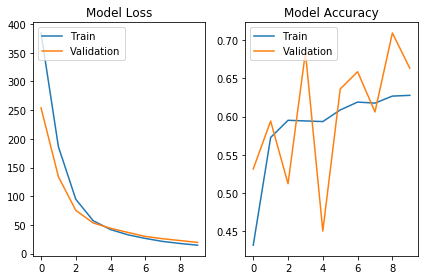

1131/1131 [==============================] - 0s 14us/step

Accurancy: 0.6720


In [11]:
num_epochs = 10

# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Dense(100)(text_input)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss=loss,
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_token_train, y_token_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_token_test, y_token_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.4f}'.format(scores[1]))

# Save the model
#model.save('word_saved_models/Linear-Token-{:.3f}.h5'.format((scores[1] * 100)))

In [12]:
preds = model.predict(x_token_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_token_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

1131/1131 [==============================] - 0s 10us/step


(0.671971706454465, 0.3545015221510229, 0.09368917716012141)

## Linear - Morph

Train on 5984 samples, validate on 1497 samples
Epoch 1/10
5984/5984 [==============================] - 0s 41us/step - loss: 284.7313 - accuracy: 0.3748 - val_loss: 197.1370 - val_accuracy: 0.5017
Epoch 2/10
5984/5984 [==============================] - 0s 27us/step - loss: 169.5079 - accuracy: 0.5216 - val_loss: 128.0834 - val_accuracy: 0.5932
Epoch 3/10
5984/5984 [==============================] - 0s 27us/step - loss: 108.1147 - accuracy: 0.5523 - val_loss: 85.4828 - val_accuracy: 0.6273
Epoch 4/10
5984/5984 [==============================] - 0s 29us/step - loss: 72.2790 - accuracy: 0.5914 - val_loss: 60.1817 - val_accuracy: 0.6446
Epoch 5/10
5984/5984 [==============================] - 0s 27us/step - loss: 51.7437 - accuracy: 0.6115 - val_loss: 41.7942 - val_accuracy: 0.6580
Epoch 6/10
5984/5984 [==============================] - 0s 27us/step - loss: 36.4360 - accuracy: 0.6141 - val_loss: 29.1709 - val_accuracy: 0.6867
Epoch 7/10
5984/5984 [==============================] - 0s 27us/s

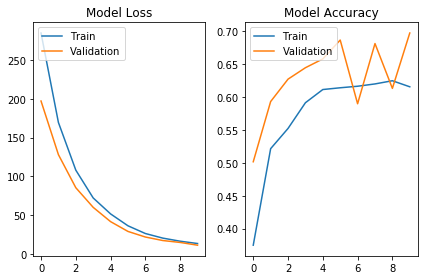

1132/1132 [==============================] - 0s 14us/step

Accurancy: 0.7420


In [13]:
# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Dense(100)(text_input)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss=loss,
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_morph_train, y_morph_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_morph_test, y_morph_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.4f}'.format(scores[1]))

# Save the model
# model.save('word_saved_models/Linear-Morph-{:.3f}.h5'.format((scores[1] * 100)))

In [14]:
preds = model.predict(x_morph_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_morph_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

1132/1132 [==============================] - 0s 10us/step


(0.7420494699646644, 0.3779600787804333, 0.14691088259224114)

## CNN - Token

Train on 5990 samples, validate on 1498 samples
Epoch 1/5
5990/5990 [==============================] - 2s 324us/step - loss: 0.7071 - accuracy: 0.7057 - val_loss: 0.6252 - val_accuracy: 0.7477
Epoch 2/5
5990/5990 [==============================] - 1s 200us/step - loss: 0.6431 - accuracy: 0.7265 - val_loss: 0.5859 - val_accuracy: 0.7590
Epoch 3/5
5990/5990 [==============================] - 1s 206us/step - loss: 0.5449 - accuracy: 0.7881 - val_loss: 0.4704 - val_accuracy: 0.8104
Epoch 4/5
5990/5990 [==============================] - 1s 208us/step - loss: 0.4252 - accuracy: 0.8447 - val_loss: 0.4143 - val_accuracy: 0.8471
Epoch 5/5
5990/5990 [==============================] - 1s 193us/step - loss: 0.3321 - accuracy: 0.8890 - val_loss: 0.3868 - val_accuracy: 0.8518


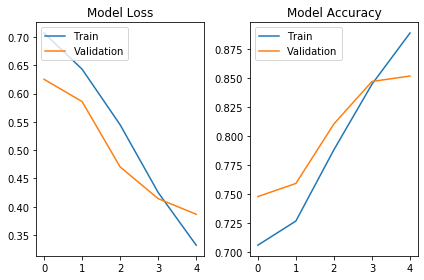

1131/1131 [==============================] - 0s 55us/step

Accurancy: 0.873


In [15]:
num_epochs = 5

# Create new TF graph
K.clear_session()

# Construct model
convs = []
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
for fsz in [3, 8]:
    conv = Conv1D(128, fsz, padding='valid', activation='relu')(x)
    pool = MaxPool1D()(conv)
    convs.append(pool)
x = Concatenate(axis=1)(convs)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss=loss,
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_token_train, y_token_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_token_test, y_token_test,
                        batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
# model.save('word_saved_models/CNN-Token-{:.3f}.h5'.format((scores[1] * 100)))

In [16]:
preds = model.predict(x_token_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_token_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

1131/1131 [==============================] - 0s 64us/step


(0.8726790450928382, 0.5350758616069933, 0.5988110218630709)

## CNN - Morph

Train on 5984 samples, validate on 1497 samples
Epoch 1/5
5984/5984 [==============================] - 1s 223us/step - loss: 0.6998 - accuracy: 0.7066 - val_loss: 0.6290 - val_accuracy: 0.7422
Epoch 2/5
5984/5984 [==============================] - 1s 188us/step - loss: 0.6372 - accuracy: 0.7341 - val_loss: 0.5648 - val_accuracy: 0.7756
Epoch 3/5
5984/5984 [==============================] - 1s 196us/step - loss: 0.5053 - accuracy: 0.8003 - val_loss: 0.4489 - val_accuracy: 0.8236
Epoch 4/5
5984/5984 [==============================] - 1s 192us/step - loss: 0.3946 - accuracy: 0.8548 - val_loss: 0.4031 - val_accuracy: 0.8464
Epoch 5/5
5984/5984 [==============================] - 1s 196us/step - loss: 0.3173 - accuracy: 0.8889 - val_loss: 0.3912 - val_accuracy: 0.8570


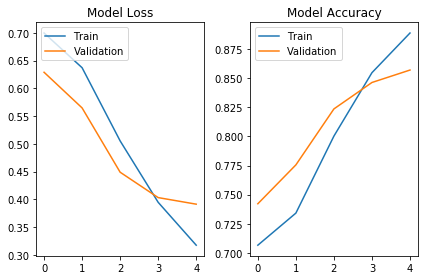

1132/1132 [==============================] - 0s 54us/step

Accurancy: 0.8684


In [17]:
# Create new TF graph
K.clear_session()

# Construct model
convs = []
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
for fsz in [3, 8]:
    conv = Conv1D(128, fsz, padding='valid', activation='relu')(x)
    pool = MaxPool1D()(conv)
    convs.append(pool)
x = Concatenate(axis=1)(convs)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_morph_train, y_morph_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_morph_test, y_morph_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.4f}'.format(scores[1]))

# Save the model
# model.save('word_saved_models/CNN-Morph-{:.3f}.h5'.format((scores[1] * 100)))

In [18]:
preds = model.predict(x_morph_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_morph_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

1132/1132 [==============================] - 0s 62us/step


(0.8683745583038869, 0.5306776556776557, 0.5900507495398117)

## LSTM - Token

Train on 5990 samples, validate on 1498 samples
Epoch 1/7
5990/5990 [==============================] - 12s 2ms/step - loss: 0.8557 - accuracy: 0.6553 - val_loss: 0.6727 - val_accuracy: 0.7350
Epoch 2/7
5990/5990 [==============================] - 11s 2ms/step - loss: 0.7329 - accuracy: 0.6828 - val_loss: 0.6754 - val_accuracy: 0.7343
Epoch 3/7
5990/5990 [==============================] - 11s 2ms/step - loss: 0.7246 - accuracy: 0.6885 - val_loss: 0.6586 - val_accuracy: 0.7403
Epoch 4/7
5990/5990 [==============================] - 11s 2ms/step - loss: 0.7222 - accuracy: 0.6927 - val_loss: 0.6602 - val_accuracy: 0.7503
Epoch 5/7
5990/5990 [==============================] - 11s 2ms/step - loss: 0.6503 - accuracy: 0.7327 - val_loss: 0.5294 - val_accuracy: 0.8091
Epoch 6/7
5990/5990 [==============================] - 11s 2ms/step - loss: 0.4417 - accuracy: 0.8389 - val_loss: 0.4151 - val_accuracy: 0.8478
Epoch 7/7
5990/5990 [==============================] - 11s 2ms/step - loss: 0.3404 - acc

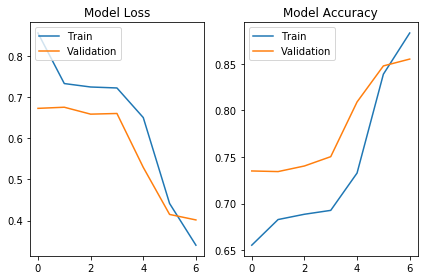

1131/1131 [==============================] - 0s 371us/step

Accurancy: 0.872


In [19]:
num_epochs = 7
lstm_units = 93

# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = LSTM(units=lstm_units, return_sequences=True)(x)
x = LSTM(units=lstm_units)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_token_train, y_token_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_token_test, y_token_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
# model.save('word_saved_models/LSTM-Token-{:.3f}.h5'.format((scores[1] * 100)))

In [20]:
preds = model.predict(x_token_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_token_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

1131/1131 [==============================] - 0s 427us/step


(0.8717948717948718, 0.5332124230848158, 0.598866255085619)

## LSTM - Morph

Train on 5984 samples, validate on 1497 samples
Epoch 1/7
5984/5984 [==============================] - 12s 2ms/step - loss: 0.8201 - accuracy: 0.6668 - val_loss: 0.6692 - val_accuracy: 0.7328
Epoch 2/7
5984/5984 [==============================] - 11s 2ms/step - loss: 0.7216 - accuracy: 0.6853 - val_loss: 0.6612 - val_accuracy: 0.7328
Epoch 3/7
5984/5984 [==============================] - 11s 2ms/step - loss: 0.7110 - accuracy: 0.6987 - val_loss: 0.6365 - val_accuracy: 0.7502
Epoch 4/7
5984/5984 [==============================] - 11s 2ms/step - loss: 0.5360 - accuracy: 0.7953 - val_loss: 0.4693 - val_accuracy: 0.8283
Epoch 5/7
5984/5984 [==============================] - 11s 2ms/step - loss: 0.3879 - accuracy: 0.8638 - val_loss: 0.4058 - val_accuracy: 0.8464
Epoch 6/7
5984/5984 [==============================] - 11s 2ms/step - loss: 0.3429 - accuracy: 0.8877 - val_loss: 0.4436 - val_accuracy: 0.8611
Epoch 7/7
5984/5984 [==============================] - 11s 2ms/step - loss: 0.2876 - acc

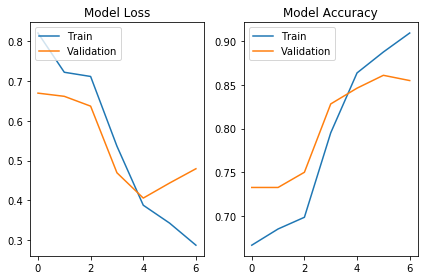

1132/1132 [==============================] - 0s 368us/step

Accurancy: 0.873


In [21]:
num_epochs = 7

# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = LSTM(units=lstm_units, return_sequences=True)(x)
x = LSTM(units=lstm_units)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_morph_train, y_morph_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_morph_test, y_morph_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
# model.save('word_saved_models/LSTM-Morph-{:.3f}.h5'.format((scores[1] * 100)))

In [22]:
preds = model.predict(x_morph_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_morph_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

1132/1132 [==============================] - 0s 425us/step


(0.872791519434629, 0.5254955340249094, 0.5789790559720178)

## BiLSTM - Token

Train on 5990 samples, validate on 1498 samples
Epoch 1/3
5990/5990 [==============================] - 23s 4ms/step - loss: 0.7699 - accuracy: 0.6905 - val_loss: 0.6246 - val_accuracy: 0.7583
Epoch 2/3
5990/5990 [==============================] - 22s 4ms/step - loss: 0.6249 - accuracy: 0.7449 - val_loss: 0.5318 - val_accuracy: 0.7904
Epoch 3/3
5990/5990 [==============================] - 22s 4ms/step - loss: 0.4491 - accuracy: 0.8339 - val_loss: 0.4272 - val_accuracy: 0.8284


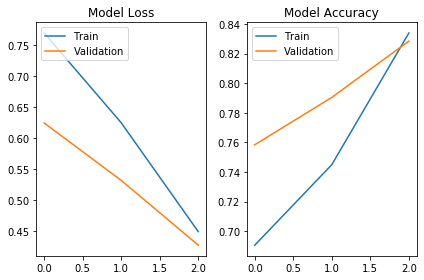

1131/1131 [==============================] - 1s 696us/step

Accurancy: 0.849


In [23]:
num_epochs = 3

# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = Bidirectional(LSTM(units=lstm_units, return_sequences=True))(x)
x = Bidirectional(LSTM(units=lstm_units))(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_token_train, y_token_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_token_test, y_token_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
# model.save('word_saved_models/BiLSTM-Token-{:.3f}.h5'.format((scores[1] * 100)))

In [24]:
preds = model.predict(x_token_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_token_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

1131/1131 [==============================] - 1s 806us/step


(0.8488063660477454, 0.5209694279603094, 0.5766098232235334)

## BiLSTM - Morph

Train on 5984 samples, validate on 1497 samples
Epoch 1/3
5984/5984 [==============================] - 23s 4ms/step - loss: 0.7947 - accuracy: 0.6761 - val_loss: 0.6373 - val_accuracy: 0.7442
Epoch 2/3
5984/5984 [==============================] - 22s 4ms/step - loss: 0.6238 - accuracy: 0.7386 - val_loss: 0.4968 - val_accuracy: 0.7936
Epoch 3/3
5984/5984 [==============================] - 22s 4ms/step - loss: 0.4573 - accuracy: 0.8280 - val_loss: 0.4085 - val_accuracy: 0.8450


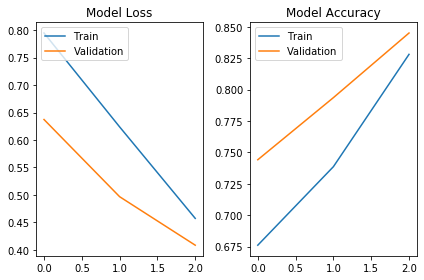

1132/1132 [==============================] - 1s 697us/step

Accurancy: 0.853


In [25]:
# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = Bidirectional(LSTM(units=lstm_units, return_sequences=True))(x)
x = Bidirectional(LSTM(units=lstm_units))(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_morph_train, y_morph_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_morph_test, y_morph_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
# model.save('word_saved_models/BiLSTM-Morph-{:.3f}.h5'.format((scores[1] * 100)))

In [26]:
preds = model.predict(x_morph_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_morph_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

1132/1132 [==============================] - 1s 808us/step


(0.8533568904593639, 0.5210814785358698, 0.569254406395868)

## MLP - Token

Train on 5990 samples, validate on 1498 samples
Epoch 1/6
5990/5990 [==============================] - 1s 223us/step - loss: 0.7657 - accuracy: 0.6636 - val_loss: 0.6645 - val_accuracy: 0.7510
Epoch 2/6
5990/5990 [==============================] - 1s 190us/step - loss: 0.7263 - accuracy: 0.6960 - val_loss: 0.6333 - val_accuracy: 0.7537
Epoch 3/6
5990/5990 [==============================] - 1s 188us/step - loss: 0.6925 - accuracy: 0.7012 - val_loss: 0.6176 - val_accuracy: 0.7503
Epoch 4/6
5990/5990 [==============================] - 1s 189us/step - loss: 0.6662 - accuracy: 0.7169 - val_loss: 0.5910 - val_accuracy: 0.7557
Epoch 5/6
5990/5990 [==============================] - 1s 189us/step - loss: 0.6154 - accuracy: 0.7377 - val_loss: 0.5435 - val_accuracy: 0.7750
Epoch 6/6
5990/5990 [==============================] - 1s 188us/step - loss: 0.5400 - accuracy: 0.7694 - val_loss: 0.4783 - val_accuracy: 0.7964


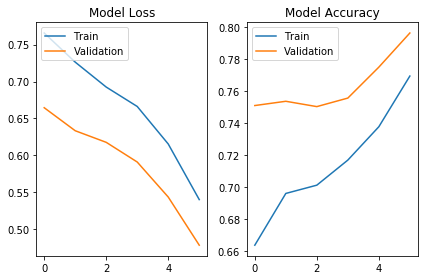

1131/1131 [==============================] - 0s 30us/step

Accurancy: 0.814


In [27]:
num_epochs = 6

# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_token_train, y_token_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_token_test, y_token_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
# model.save('word_saved_models/MLP-Token-{:.3f}.h5'.format((scores[1] * 100)))

In [28]:
preds = model.predict(x_token_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_token_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

1131/1131 [==============================] - 0s 47us/step


(0.8143236074270557, 0.4697460559529525, 0.41199556238228974)

## MLP - Morph

Train on 5984 samples, validate on 1497 samples
Epoch 1/6
5984/5984 [==============================] - 1s 220us/step - loss: 0.8261 - accuracy: 0.6168 - val_loss: 0.6499 - val_accuracy: 0.7368
Epoch 2/6
5984/5984 [==============================] - 1s 188us/step - loss: 0.7576 - accuracy: 0.6711 - val_loss: 0.6326 - val_accuracy: 0.7482
Epoch 3/6
5984/5984 [==============================] - 1s 187us/step - loss: 0.7149 - accuracy: 0.6912 - val_loss: 0.6238 - val_accuracy: 0.7502
Epoch 4/6
5984/5984 [==============================] - 1s 188us/step - loss: 0.6755 - accuracy: 0.7166 - val_loss: 0.5898 - val_accuracy: 0.7589
Epoch 5/6
5984/5984 [==============================] - 1s 188us/step - loss: 0.6175 - accuracy: 0.7418 - val_loss: 0.5604 - val_accuracy: 0.7709
Epoch 6/6
5984/5984 [==============================] - 1s 189us/step - loss: 0.5283 - accuracy: 0.7839 - val_loss: 0.4742 - val_accuracy: 0.8029


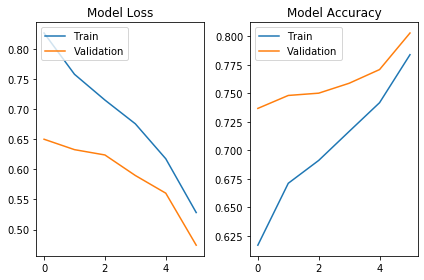

1132/1132 [==============================] - 0s 29us/step

Accurancy: 0.827


In [29]:
# Create new TF graph
K.clear_session()

# Construct model
text_input = Input(shape=(max_document_length,))
x = Embedding(vocabulary_size, embedding_size)(text_input)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(dropout_keep_prob)(x)
preds = Dense(n_logits, activation='softmax')(x)

model = Model(text_input, preds)

adam = optimizers.Adam(lr=lr)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_morph_train, y_morph_train,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=1,
                    validation_split=dev_size)

# Plot training accuracy and loss
plot_loss_and_accuracy(history)

# Evaluate the model
scores = model.evaluate(x_morph_test, y_morph_test,
                       batch_size=batch_size, verbose=1)
print('\nAccurancy: {:.3f}'.format(scores[1]))

# Save the model
# model.save('word_saved_models/MLP-Morph-{:.3f}.h5'.format((scores[1] * 100)))

In [30]:
preds = model.predict(x_morph_test, batch_size=batch_size, verbose=1)
preds = preds.argmax(1)
ys = y_morph_test.argmax(1)
accuracy_score(ys, preds), f1_score(ys, preds, average='macro'), matthews_corrcoef(ys, preds)

1132/1132 [==============================] - 0s 47us/step


(0.8268551236749117, 0.47103773439783403, 0.41792137432310744)